<h2 id="data">MACHINE LEARNING PROJECT</h2>
verzeo machine learning main project batch no:ML063B2


In [7]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import preprocessing 
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,10


In [8]:
df =pd.read_csv('C:\\Users\\Shreyas Venishetty\\Desktop\\GOAL STREET\\Machine-Learning-master\\DATA\\Information.csv',engine ='python')

In [9]:
df.head(3)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

<h2 id="data">Divide the dataset</h2>
Here the dataset is divided into three df,male and female dataset for easy handling.

In [11]:
female=df.loc[df.gender=='female']
male = df.loc[df.gender=='male'] 
brand=df.loc[df.gender=='brand']
df = df[df["gender"].isin(['male','female'])]

<h2 id="data">label encoding</h2>
Label encoding the gender column

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender2']=le.fit_transform(df['gender'])

<h2 id="data_exploration_for_linear_regression_1">Data Exploration and feature selection</h2>
exploring the data and get rid of unwanted columns.

In [13]:
df=df[['_trusted_judgments','gender2', 'gender:confidence',
       'profile_yn:confidence', 'fav_number',
       'retweet_count','tweet_count','text']]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12894 entries, 0 to 20049
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _trusted_judgments     12894 non-null  int64  
 1   gender2                12894 non-null  int32  
 2   gender:confidence      12894 non-null  float64
 3   profile_yn:confidence  12894 non-null  float64
 4   fav_number             12894 non-null  int64  
 5   retweet_count          12894 non-null  int64  
 6   tweet_count            12894 non-null  int64  
 7   text                   12894 non-null  object 
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 856.2+ KB


In [15]:
df.columns

Index(['_trusted_judgments', 'gender2', 'gender:confidence',
       'profile_yn:confidence', 'fav_number', 'retweet_count', 'tweet_count',
       'text'],
      dtype='object')

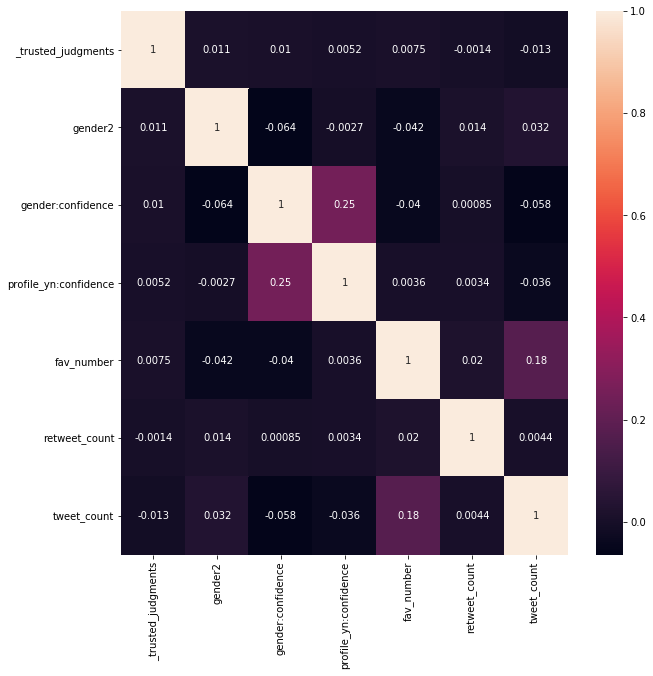

In [16]:
sb.heatmap(df.corr(), annot =True)

<h2 id="data">COMMON WORDS</h2>
Lets find the common words used by male and female. Here we did find the most used words by joining all the ['text'] values using the built in function "join" and count the words and found the answers

common words used by male 

In [17]:
male.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)


In [18]:
pd.Series(' '.join(male.text).split()).value_counts()

the               4251
and               3685
to                1906
a                 1645
I                 1570
                  ... 
MTV's                1
@TrulyYours40        1
TRUMP                1
Bryan,               1
@NerdHeardBen!       1
Length: 27670, dtype: int64

common words used by female 

In [19]:
female.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0,yes,1.0,3/11/10 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada)


In [20]:
pd.Series(' '.join(female.text).split()).value_counts()

and           4352
the           4049
I             2364
to            2188
a             1454
              ... 
"Ugly            1
damages          1
_Ù÷â_ÙÕ¥         1
#equalpay        1
@Valcaakes       1
Length: 26141, dtype: int64

<h3 id="data">therefore the common words used by male and female are "and" , "the" & "to"</h3>

<h2 id="data">AVERAGE WORDS</h2>
<p>Lets find the average words used by both gender</p>
here we create a dictionary and iterate through the the "text" column and find how many times the each words occured after that sum of the count was found and divide it with column value.


In [21]:
number_of_words={}
for i in range(female.shape[0]):
    words=str(female['text'].values[i]).split(' ')
    for j in words:
        try:
            count=number_of_words[j]
            number_of_words[j]=count+1
        except:
            number_of_words[j]=1
            
number_of_words

{'Watching': 5,
 'Neighbours': 1,
 'on': 710,
 'Sky+': 1,
 'catching': 4,
 'up': 295,
 'with': 616,
 'the': 4044,
 'Neighbs!!': 1,
 'Xxx': 2,
 '_Ù÷Ä_Ù÷Ä_Ù÷Ä_ÙÔÎ_Ù�È_ÙÔ�_Ù�È': 1,
 'Ive': 6,
 'seen': 30,
 'people': 198,
 'train': 10,
 'lamps,': 1,
 'chairs,': 1,
 'tvs': 1,
 'etc': 5,
 '': 465,
 'https://t.co/w6zf4pVM4I': 1,
 '@_Aphmau_': 1,
 'pic': 6,
 'defines': 1,
 'all': 353,
 'mcd': 2,
 'fangirls/fanboys': 1,
 'and': 4250,
 'shippers': 2,
 'xD': 6,
 '@Evielady': 1,
 'just': 464,
 'how': 167,
 'lovely': 10,
 'is': 977,
 'tree': 3,
 'this': 403,
 'year!': 2,
 'Never': 10,
 'it': 728,
 'as': 156,
 'gorgeous': 7,
 '#Autumn': 2,
 '#colour': 1,
 'Just': 118,
 'put': 58,
 'my': 1065,
 'ass': 37,
 'line': 10,
 'for': 1071,
 'you': 1298,
 'repay': 1,
 'me.': 41,
 'will': 180,
 'i': 328,
 'even': 115,
 'need': 144,
 'sound': 7,
 'effects': 4,
 'diviners': 1,
 'tonight': 26,
 'https://t.co/EROGWTFTYo': 3,
 "It's": 90,
 'a': 1454,
 'glow': 2,
 'of': 1208,
 'satisfaction': 1,
 're': 8,
 'The': 54

In [22]:
total_no_words=sum(number_of_words.values())

In [23]:
female.shape

(6700, 26)

In [24]:
average_number_words_female=total_no_words/female.shape[0]

In [25]:
number_of_words={}
for i in range(male.shape[0]):
    words=str(male['text'].values[i]).split(' ')
    for j in words:
        try:
            count=number_of_words[j]
            number_of_words[j]=count+1
        except:
            number_of_words[j]=1
            
number_of_words

{'Robbie': 1,
 'E': 2,
 'Responds': 1,
 'To': 37,
 'Critics': 1,
 'After': 12,
 'Win': 3,
 'Against': 3,
 'Eddie': 2,
 'Edwards': 4,
 'In': 66,
 'The': 616,
 '#WorldTitleSeries': 1,
 'https://t.co/NSybBmVjKZ': 1,
 '‰ÛÏIt': 2,
 'felt': 5,
 'like': 319,
 'they': 251,
 'were': 80,
 'my': 536,
 'friends': 31,
 'and': 3651,
 'I': 1550,
 'was': 359,
 'living': 11,
 'the': 4248,
 'story': 22,
 'with': 498,
 'them‰Û�': 1,
 'https://t.co/arngE0YHNO': 1,
 '#retired': 1,
 '#IAN1': 2,
 'https://t.co/CIzCANPQFz': 1,
 'i': 251,
 'absolutely': 7,
 'adore': 2,
 'when': 199,
 'louis': 6,
 'starts': 15,
 'songs': 16,
 'it': 611,
 'hits': 4,
 'me': 418,
 'hard': 21,
 'but': 265,
 'feels': 11,
 'good': 134,
 'Hi': 15,
 '@JordanSpieth': 1,
 '-': 314,
 'Looking': 13,
 'at': 386,
 'url': 3,
 'do': 226,
 'you': 1125,
 'use': 44,
 '@IFTTT?!': 1,
 '': 603,
 "Don't": 31,
 'typically': 1,
 'see': 130,
 'an': 154,
 'advanced': 2,
 'user': 4,
 'on': 758,
 '@PGATOUR!': 1,
 'https://t.co/H68ou5PE9L': 1,
 'Gala': 5,
 

In [26]:
total_no_words=sum(number_of_words.values())

In [27]:
male.shape

(6194, 26)

In [28]:
average_number_words_male=total_no_words/male.shape[0]

In [29]:
print("The average number of words used by FEMALE in thier tweet is:",average_number_words_female)
print("The average number of words used by MALE in thier tweet is:",average_number_words_male)


The average number of words used by FEMALE in thier tweet is: 15.850298507462687
The average number of words used by MALE in thier tweet is: 16.237003551824348


<h2 id="data"> Ensemble Machine learning Modelling </h2>

assign independent and dependent variables. Here gender is the dependent variable 

In [30]:
X = df[['_trusted_judgments','gender:confidence',
       'profile_yn:confidence', 'fav_number',
       'retweet_count','tweet_count']].values
Y =df[['gender2']].values

TESTING AND SPLITTING THE DATASET

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

<h1>KNN ALGORITHM</h1>
finding the knn algorithm accuracy 

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)


C:\Users\Shreyas Venishetty\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
from sklearn import metrics
y_pred = knn.predict(X_test)
print("Test set Accuracy: ",metrics.accuracy_score(Y_test, y_pred))

Test set Accuracy:  0.538151364764268


<h1>SUPPORT VECTOR MACHINE ALGORITHM</h1>
svm algorithm accuracy

In [34]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
# training Linear Regression model on training data
svc.fit(X_train, Y_train)# The coefficients

C:\Users\Shreyas Venishetty\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
y_pred = svc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print ("TEST ACCURACY:",metrics.accuracy_score(Y_test, y_pred))

TEST ACCURACY: 0.5186104218362283


<h1>RANDOM FOREST ALGORITHM</h1>
finding accuracy of random forest algorithm

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
# training Linear Regression model on training data
rfc.fit(X_train, Y_train)


C:\Users\Shreyas Venishetty\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
y_pred = rfc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print ("TEST ACCURACY:",metrics.accuracy_score(Y_test, y_pred))

TEST ACCURACY: 0.5384615384615384


<h1>ACCURACY OF THREE ALGORITHM</h1>
from the above we find each algorithm accuracy and listed down

<P>accuracy of each algorithm</P>
<P>1.KNN             :53% </P>
<P>2.SVM             :52% </P>
<P>3.RANDOM FOREST   :54% </P>
    
<h3>Comparing the Accuracy of all three, the ML algorithms suits best for the given problem is RANDOM FOREST ALGORITHM</h3>  